In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pandas import *

In [3]:
!ls

Plotting.ipynb          data1                   data_32
PosterPresentation.ppt  data_0.csv              data_parsing.ipynb
README.md               data_1.csv              plotTest.pdf
RockPaperScissors       data_16                 rock_paper_scissors.pde


In [4]:
# winner[Random Player]
#       [Well Mixed]
winner_16 = [[{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}],
          [{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}]]
winner_32 = [[{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}],
          [{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}]]
winner_64 = [[{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}],
          [{'R':0, 'P':0, 'S':0, 'M':0},{'R':0, 'P':0, 'S':0, 'M':0}]]
#extinct_time[Random Player]
#            [Well Mixed]
extinct_time_16 = [[[],[]],[[],[]]]
extinct_time_32 = [[[],[]],[[],[]]]
extinct_time_32 = [[[],[]],[[],[]]]

In [5]:
"""
This loops through the data and gets the winners
then saves that winner into the winner dictionary
"""
for i in range(60):
    data=read_csv("data_16/data_"+str(i)+".csv")
    i = int(list(data['Well Mixed'])[0])
    j = int(list(data['Random'])[0])
    if (list(data['Size'])[0] == 16):
        extinct_time_16[i][j].append(size(data['R']))
        winner_16[i][j]['R'] += int(list(data['R'])[-1] > 0)
        winner_16[i][j]['P'] += int(list(data['P'])[-1] > 0)
        winner_16[i][j]['S'] += int(list(data['S'])[-1] > 0)
        winner_16[i][j]['M'] += int(list(data['M'])[-1] > 0)
    elif (list(data['Size'])[0] == 32):
        extinct_time_32[i][j].append(size(data['R']))
        winner_32[i][j]['R'] += int(list(data['R'])[-1] > 0)
        winner_32[i][j]['P'] += int(list(data['P'])[-1] > 0)
        winner_32[i][j]['S'] += int(list(data['S'])[-1] > 0)
        winner_32[i][j]['M'] += int(list(data['M'])[-1] > 0)
    elif (list(data['Size'])[0] == 64):
        extinct_time_64[i][j].append(size(data['R']))
        winner_64[i][j]['R'] += int(list(data['R'])[-1] > 0)
        winner_64[i][j]['P'] += int(list(data['P'])[-1] > 0)
        winner_64[i][j]['S'] += int(list(data['S'])[-1] > 0)
        winner_64[i][j]['M'] += int(list(data['M'])[-1] > 0)

In [6]:
winner_16

[[{'M': 0, 'P': 3, 'R': 3, 'S': 9}, {'M': 4, 'P': 3, 'R': 3, 'S': 5}],
 [{'M': 0, 'P': 8, 'R': 4, 'S': 3}, {'M': 4, 'P': 3, 'R': 5, 'S': 3}]]

In [7]:
list1 = [3,3,9,0]

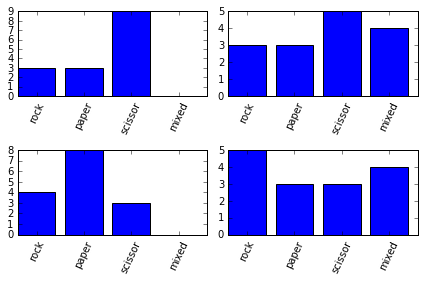

In [15]:
N=['R','P','S','M']
k=1
for i in range(2):
    for j in range(2):
        L=[]
        for n in N:
            L.append(winner_16[i][j][n])
        subplot(2,2,k)
        bar([1,2,3,4],L)
        xticks([1.4,2.4,3.4,4.4],['rock','paper','scissor','mixed'],rotation=65)
        k=k+1
tight_layout()

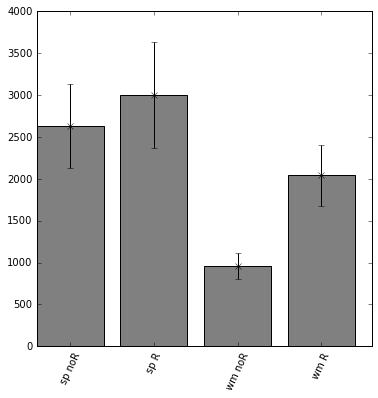

In [37]:
figure(figsize=[6,6])
extinct_time_16
E=[]
S=[]
for i in range(2):
    for j in range(2):
        E.append(mean(extinct_time_16[i][j])*100)
        S.append(std(numpy.array(extinct_time_16[i][j])*100)/float(sqrt(len(extinct_time_16[i][j]))))
        
bar([1,2,3,4],E,color=(0.5,0.5,0.5))
errorbar([1.4,2.4,3.4,4.4],E,S,fmt="xk")
xticks([1.4,2.4,3.4,4.4],["sp noR","sp R","wm noR","wm R"],rotation=65)
savefig("barGraph_extinctTime16.pdf")

In [20]:
!ls

Plotting.ipynb             data_1.csv
PosterPresentation.ppt     data_16
README.md                  data_32
RockPaperScissors          data_parsing.ipynb
barGraph_extinctTime16.pdf plotTest.pdf
data1                      rock_paper_scissors.pde
data_0.csv


<Container object of 3 artists>

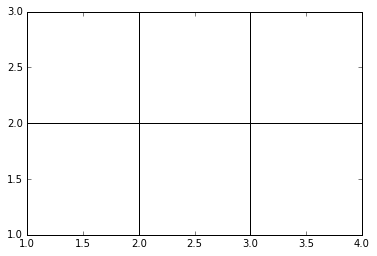

In [31]:
errorbar([1,2,3,4],[2,2,2,2],[1,1,1,1],fmt='k-')

[1955.3914072521534, 2450.0340133693385, 617.30597491573553, 1425.3888358386048]


ValueError: In safezip, len(args[0])=4 but len(args[1])=1

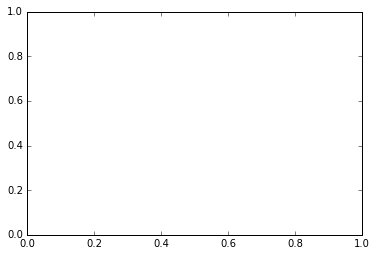

In [26]:
print(S)
errorbar([1.4,2.4,3.4,4.4],[1,2,3,4],S,'k-')